previous - in one neuron case - only two parameters - implemented in scalar way in code.

now - network with multiple layers, multiple input, multiple output  
implemented using vectorization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Data (blob)

In [2]:
from sklearn.datasets import make_blobs

# generate blob data
data, labels = make_blobs(
    n_samples=1000,  # number of datapoints
    centers=4,  # number of blobs - one blob has one label -> number of classes.
    n_features=2,  # number of inputs
    random_state=0,  # same random_state -> generate same data - for repeatability
)

from sklearn.model_selection import train_test_split

XX_train, XX_val, Y_train, Y_val = train_test_split(
    data, labels, stratify=labels, random_state=0
)

In [3]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
# 0 -> (1, 0, 0, 0), 1 -> (0, 1, 0, 0), 2 -> (0, 0, 1, 0), 3 -> (0, 0, 0, 1)
YY_OH_train = enc.fit_transform(np.expand_dims(Y_train, 1)).toarray()
YY_OH_val = enc.fit_transform(np.expand_dims(Y_val, 1)).toarray()
print(YY_OH_train.shape, YY_OH_val.shape)

(750, 4) (250, 4)


In [4]:
Wmat1 = np.random.randn(2, 2)
Wmat2 = np.random.randn(2, 4)
print(Wmat1)
print(Wmat2)

# so that all are compared with same initial parameters

[[-0.32562711 -1.00761858]
 [ 0.51258505 -0.40615198]]
[[-1.40106577  1.1388825  -0.19372539 -0.74798649]
 [-0.49443569  0.8139172   0.63570262  0.84041097]]


In [5]:
from sklearn.metrics import accuracy_score

# function to find and print accuracy; given model
# predict with model - accuracy(prediction, ground truth)
def print_accuracy(model):    
    YY_pred_train = model.predict(XX_train)
    Y_pred_train = np.argmax(YY_pred_train,1)
    
    YY_pred_val = model.predict(XX_val)
    Y_pred_val = np.argmax(YY_pred_val,1)
    
    accuracy_train = accuracy_score(Y_pred_train, Y_train)
    accuracy_val = accuracy_score(Y_pred_val, Y_val)
    
    print("Training accuracy", round(accuracy_train, 4))
    print("Validation accuracy", round(accuracy_val, 4))

### FF Class

vectorized implementation of various optimization algorithms also.

In [6]:
from ff_vectorized_opti import FFVectorOpti

In [7]:
# model = FFVectorOpti(Wmat1, Wmat2) 
# need to instatiate each time
# else will start from the current parameters

## Using various hyperparameters

### GD

  0%|          | 0/100 [00:00<?, ?epoch/s]

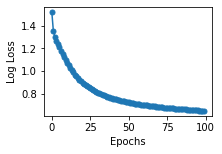

Training accuracy 0.696
Validation accuracy 0.684
CPU times: user 333 ms, sys: 135 ms, total: 469 ms
Wall time: 273 ms


In [8]:
%%time
model = FFVectorOpti(Wmat1, Wmat2) 
model.fit(XX_train, YY_OH_train, epochs=100, eta=1, algo="GD", display_loss=True)
print_accuracy(model)

### Mini Batch 128

  0%|          | 0/100 [00:00<?, ?epoch/s]

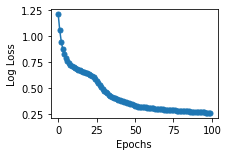

Training accuracy 0.896
Validation accuracy 0.912
CPU times: user 242 ms, sys: 118 ms, total: 360 ms
Wall time: 234 ms


In [9]:
%%time
model = FFVectorOpti(Wmat1, Wmat2) 
model.fit(XX_train, YY_OH_train, epochs=100, eta=1, algo="MiniBatch", mini_batch_size=128, display_loss=True)
print_accuracy(model)

### Smaller batch size = 8

smaller batch size => oscillatory. noisy.  
as more stochasticity

  0%|          | 0/100 [00:00<?, ?epoch/s]

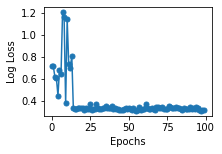

Training accuracy 0.88
Validation accuracy 0.884
CPU times: user 901 ms, sys: 136 ms, total: 1.04 s
Wall time: 876 ms


In [10]:
%%time
model = FFVectorOpti(Wmat1, Wmat2) 
model.fit(XX_train, YY_OH_train, epochs=100, eta=1, algo="MiniBatch", mini_batch_size=8, display_loss=True)
print_accuracy(model)

### Momentum

  0%|          | 0/100 [00:00<?, ?epoch/s]

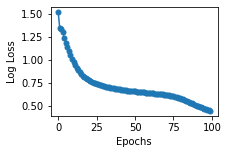

Training accuracy 0.888
Validation accuracy 0.896
CPU times: user 281 ms, sys: 124 ms, total: 406 ms
Wall time: 223 ms


In [11]:
%%time
model = FFVectorOpti(Wmat1, Wmat2) 
model.fit(XX_train, YY_OH_train, epochs=100, eta=1, algo="Momentum", gamma=0.5, display_loss=True)
print_accuracy(model)

### Increased momentum 

(gamma)

more overshoots

  0%|          | 0/100 [00:00<?, ?epoch/s]

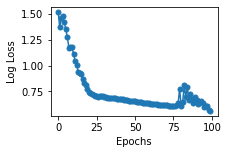

Training accuracy 0.812
Validation accuracy 0.828
CPU times: user 264 ms, sys: 140 ms, total: 405 ms
Wall time: 238 ms


In [12]:
%%time
model = FFVectorOpti(Wmat1, Wmat2) 
model.fit(XX_train, YY_OH_train, epochs=100, eta=1, algo="Momentum", gamma=0.9, display_loss=True)
print_accuracy(model)

### Even more momentum

  0%|          | 0/100 [00:00<?, ?epoch/s]

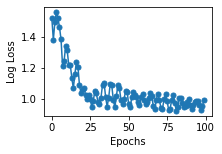

Training accuracy 0.416
Validation accuracy 0.416
CPU times: user 226 ms, sys: 130 ms, total: 355 ms
Wall time: 217 ms


In [13]:
%%time
model = FFVectorOpti(Wmat1, Wmat2) 
model.fit(XX_train, YY_OH_train, epochs=100, eta=1, algo="Momentum", gamma=0.99, display_loss=True)
print_accuracy(model)

### NAG

  0%|          | 0/100 [00:00<?, ?epoch/s]

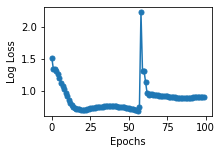

Training accuracy 0.532
Validation accuracy 0.536
CPU times: user 259 ms, sys: 114 ms, total: 374 ms
Wall time: 225 ms


In [14]:
%%time
model = FFVectorOpti(Wmat1, Wmat2) 
model.fit(XX_train, YY_OH_train, epochs=100, eta=1, algo="NAG", gamma=0.99, display_loss=True)
print_accuracy(model)

  0%|          | 0/100 [00:00<?, ?epoch/s]

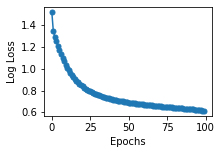

Training accuracy 0.8413
Validation accuracy 0.872
CPU times: user 291 ms, sys: 134 ms, total: 425 ms
Wall time: 279 ms


In [15]:
%%time
model = FFVectorOpti(Wmat1, Wmat2) 
model.fit(XX_train, YY_OH_train, epochs=100, eta=1, algo="NAG", gamma=0.5, display_loss=True)
print_accuracy(model)

  0%|          | 0/100 [00:00<?, ?epoch/s]

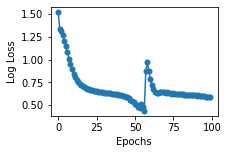

Training accuracy 0.7413
Validation accuracy 0.768
CPU times: user 265 ms, sys: 156 ms, total: 422 ms
Wall time: 236 ms


In [16]:
%%time
model = FFVectorOpti(Wmat1, Wmat2) 
model.fit(XX_train, YY_OH_train, epochs=100, eta=1, algo="NAG", gamma=0.9, display_loss=True)
print_accuracy(model)

### AdaGrad

  0%|          | 0/100 [00:00<?, ?epoch/s]

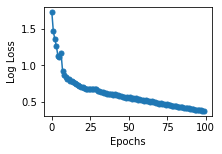

Training accuracy 0.8933
Validation accuracy 0.908
CPU times: user 251 ms, sys: 109 ms, total: 360 ms
Wall time: 239 ms


In [17]:
%%time
model = FFVectorOpti(Wmat1, Wmat2) 
model.fit(XX_train, YY_OH_train, epochs=100, eta=1, algo="AdaGrad", display_loss=True)
print_accuracy(model)

error after first epoch is larger in adagrad compared to other methods.   

r(t)=0 first=> alpha/eps => very large learning rate => very large update => large error

  0%|          | 0/100 [00:00<?, ?epoch/s]

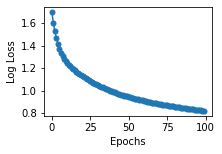

Training accuracy 0.6853
Validation accuracy 0.676
CPU times: user 241 ms, sys: 179 ms, total: 419 ms
Wall time: 233 ms


In [18]:
%%time
model = FFVectorOpti(Wmat1, Wmat2) 
model.fit(XX_train, YY_OH_train, epochs=100, eta=.1, algo="AdaGrad", display_loss=True)
print_accuracy(model)

### RMS prop

RMS prop can deal with small alpha

  0%|          | 0/100 [00:00<?, ?epoch/s]

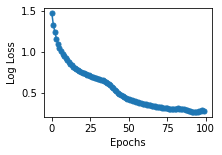

Training accuracy 0.9027
Validation accuracy 0.896
CPU times: user 266 ms, sys: 121 ms, total: 387 ms
Wall time: 235 ms


In [19]:
%%time
model = FFVectorOpti(Wmat1, Wmat2) 
model.fit(XX_train, YY_OH_train, epochs=100, eta=.1, algo="RMSProp", beta=0.9, display_loss=True)
print_accuracy(model)

  0%|          | 0/100 [00:00<?, ?epoch/s]

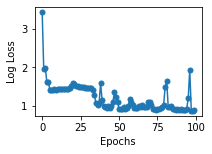

Training accuracy 0.5
Validation accuracy 0.492
CPU times: user 246 ms, sys: 115 ms, total: 361 ms
Wall time: 221 ms


In [20]:
%%time
model = FFVectorOpti(Wmat1, Wmat2) 
model.fit(XX_train, YY_OH_train, epochs=100, eta=.9, algo="RMSProp", beta=0.9, display_loss=True)
print_accuracy(model)

### Adam

  0%|          | 0/100 [00:00<?, ?epoch/s]

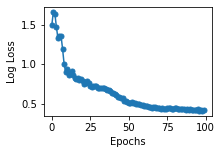

Training accuracy 0.84
Validation accuracy 0.816
CPU times: user 245 ms, sys: 152 ms, total: 397 ms
Wall time: 230 ms


In [21]:
%%time
model = FFVectorOpti(Wmat1, Wmat2) 
model.fit(XX_train, YY_OH_train, epochs=100, eta=.9, algo="Adam", beta=0.9, display_loss=True)
print_accuracy(model)

  0%|          | 0/100 [00:00<?, ?epoch/s]

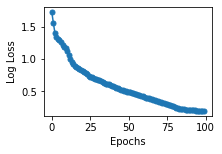

Training accuracy 0.9187
Validation accuracy 0.928
CPU times: user 265 ms, sys: 149 ms, total: 414 ms
Wall time: 237 ms


In [22]:
%%time
model = FFVectorOpti(Wmat1, Wmat2) 
model.fit(XX_train, YY_OH_train, epochs=100, eta=.1, algo="Adam", beta=0.9, display_loss=True)
print_accuracy(model)

Adam is computationally litte more expensive.

## Good configurations for each algo

### GD

moderate alpha - to oscillate, and large #epochs to drive it to min

  0%|          | 0/10000 [00:00<?, ?epoch/s]

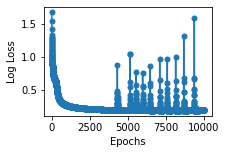

Training accuracy 0.9293
Validation accuracy 0.932
CPU times: user 9.93 s, sys: 167 ms, total: 10.1 s
Wall time: 9.93 s


In [23]:
%%time
model = FFVectorOpti(Wmat1, Wmat2) 
model.fit(XX_train, YY_OH_train, epochs=10000, eta=0.5, algo="GD", display_loss=True)
print_accuracy(model)

### momentum

same alpha, lesser #epochs

  0%|          | 0/1000 [00:00<?, ?epoch/s]

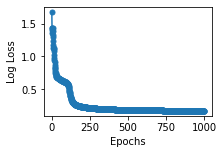

Training accuracy 0.928
Validation accuracy 0.944
CPU times: user 1.12 s, sys: 148 ms, total: 1.27 s
Wall time: 1.09 s


In [24]:
%%time
model = FFVectorOpti(Wmat1, Wmat2) 
model.fit(XX_train, YY_OH_train, epochs=1000, eta=0.5, algo="Momentum", gamma=0.9, display_loss=True)
print_accuracy(model)

### NAG

  0%|          | 0/1000 [00:00<?, ?epoch/s]

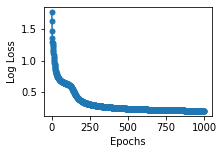

Training accuracy 0.9213
Validation accuracy 0.94
CPU times: user 1.15 s, sys: 143 ms, total: 1.29 s
Wall time: 1.14 s


In [25]:
%%time
model = FFVectorOpti(Wmat1, Wmat2) 
model.fit(XX_train, YY_OH_train, epochs=1000, eta=0.5, algo="NAG", gamma=0.9, display_loss=True)
print_accuracy(model)

### Adagrad

  0%|          | 0/500 [00:00<?, ?epoch/s]

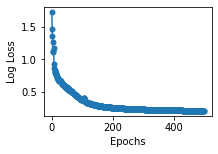

Training accuracy 0.9267
Validation accuracy 0.944
CPU times: user 629 ms, sys: 152 ms, total: 781 ms
Wall time: 613 ms


In [26]:
%%time
model = FFVectorOpti(Wmat1, Wmat2) 
model.fit(XX_train, YY_OH_train, epochs=500, eta=1, algo="AdaGrad", display_loss=True)
print_accuracy(model)

### RMS prop

  0%|          | 0/2000 [00:00<?, ?epoch/s]

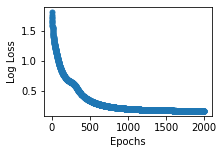

Training accuracy 0.9267
Validation accuracy 0.944
CPU times: user 2.1 s, sys: 162 ms, total: 2.26 s
Wall time: 2.09 s


In [27]:
%%time
model = FFVectorOpti(Wmat1, Wmat2) 
model.fit(XX_train, YY_OH_train, epochs=2000, eta=.01, algo="RMSProp", beta=0.9, display_loss=True)
print_accuracy(model)

### Adam

  0%|          | 0/200 [00:00<?, ?epoch/s]

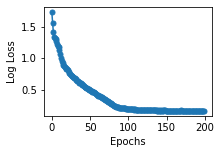

Training accuracy 0.924
Validation accuracy 0.94
CPU times: user 426 ms, sys: 110 ms, total: 536 ms
Wall time: 398 ms


In [28]:
%%time
model = FFVectorOpti(Wmat1, Wmat2) 
model.fit(XX_train, YY_OH_train, epochs=200, eta=.1, algo="Adam", beta=0.9, display_loss=True)
print_accuracy(model)